# Sentence Pairs
To do - 
Predict Contradiction / Non - Contradiction of pair of statements

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Loading the dataset
df = pd.read_csv('./data/quora_pairs/dataset.txt', header = None, sep = "\t").drop(3, axis = 1)
# df = pd.read_fwf('./data/quora_pairs/dataset.txt', sep = "\t")


# EDA

In [40]:
# Renaming the columns
df.columns = ['id', 'statement_1', 'statement_2', 'label']

In [29]:
# Checking the value counts
df.label.value_counts()

NEUTRAL          2536
ENTAILMENT       1299
CONTRADICTION     665
Name: label, dtype: int64

In [30]:
# Changing the labels 'neutral' and 'entailment' to 'non-contradiction'
df.loc[(df.label == 'NEUTRAL') | (df.label == 'ENTAILMENT'), 'label'] = 'NON-CONTRADICTION'

# Changing labels to 0 / 1
df.loc[(df.label == 'NON-CONTRADICTION'), 'label'] = 0
df.loc[(df.label == 'CONTRADICTION'), 'label'] = 1

In [31]:
# Overview of data
df.head()

,Id,statement_1,statement_2,label
0,1,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,0
1,2,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,0
2,3,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,0
3,5,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,0
4,9,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           4500 non-null   int64 
 1   statement_1  4500 non-null   object
 2   statement_2  4500 non-null   object
 3   label        4500 non-null   object
dtypes: int64(1), object(3)
memory usage: 140.8+ KB


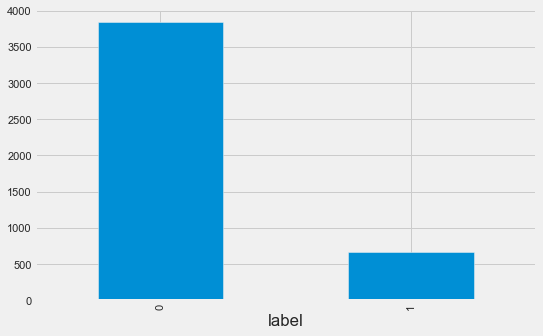

In [44]:
df.groupby('label')['id'].count().plot.bar();

### Number of unique statements

In [42]:
print('Total Number of Statements: {}'.format(len(df)))
print('Contradiction pairs: {}%'.format(round(df['label'].mean() * 100, 2)))

# Finding the total, unique and repeated number of statements
total_statements = pd.Series(df['statement_1'].tolist() + df['statement_2'].tolist())
unique_statements = len(np.unique(total_statements))
repeated_statements = np.sum(total_statements.value_counts() > 1)

print('Total number of unique statements: {}'.format(unique_statements))
print('Number of statements appearing more than once: {}'.format(repeated_statements))
print('Max number of times a single statement is repeated: {}'.format(max(total_statements.value_counts())))

Total Number of Statements: 4500
Contradiction pairs: 14.78%
Total number of unique statements: 4802
Number of statements appearing more than once: 2445
Max number of times a single statement is repeated: 31


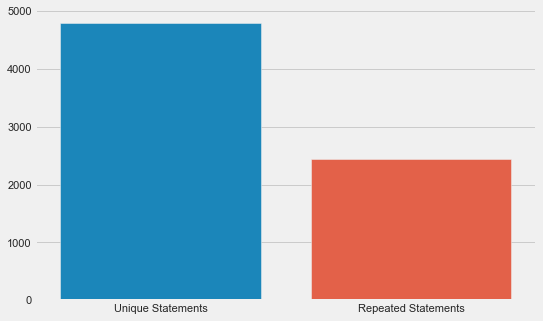

In [51]:
sns.barplot(x = ["Unique Statements", "Repeated Statements"], y = [unique_statements, repeated_statements]);

### Number of duplicate entries - v1

In [60]:
# Checking for repeated pair of questions
pair_duplicates = df[['statement_1', 'statement_2', 'label']].groupby(['statement_1', 'statement_2']).count().reset_index()
print('Number of duplicate statements: {}'.format(df.shape[0] - pair_duplicates.shape[0]))

df_v1 = pair_duplicates.copy()

Number of duplicate statements: 30


### Number of occurances of each statement

Max number of times a single statement is repeated: 31


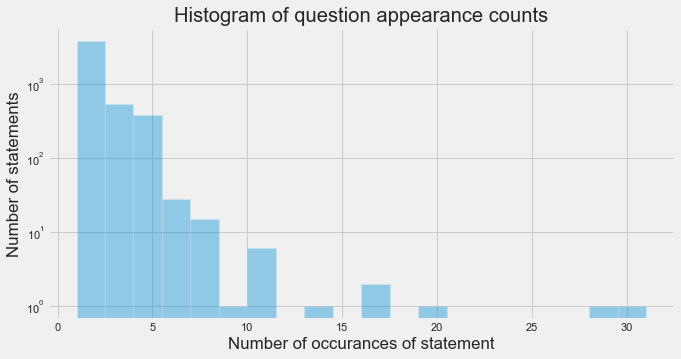

In [69]:
plt.figure(figsize=(10, 5))
sns.distplot(total_statements.value_counts(), bins = 20, kde = False)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of occurances of statement')
plt.ylabel('Number of statements')
plt.title('Histogram of question appearance counts')
print('Max number of times a single statement is repeated: {}'.format(max(total_statements.value_counts())))